In [2]:
import numpy as np
import pandas as pd

In [3]:
np.random.seed(123)
variables=  ['X','Y','Z']
labels= ['ID_0','ID_1','ID_2','ID_3','ID_4']
X= np.random.random_sample([5,3])*10
df= pd.DataFrame(X, columns=variables, index=labels)
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


#### Generating distance matrix

In [4]:
from scipy.spatial.distance import pdist, squareform
row_dist=pd.DataFrame(squareform(
    pdist(df, metric='euclidean')),
    columns=labels, index=labels)
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


In [5]:
from scipy.cluster.hierarchy import linkage
help(linkage)

Help on function linkage in module scipy.cluster.hierarchy:

linkage(y, method='single', metric='euclidean', optimal_ordering=False)
    Perform hierarchical/agglomerative clustering.
    
    The input y may be either a 1-D condensed distance matrix
    or a 2-D array of observation vectors.
    
    If y is a 1-D condensed distance matrix,
    then y must be a :math:`\binom{n}{2}` sized
    vector, where n is the number of original observations paired
    in the distance matrix. The behavior of this function is very
    similar to the MATLAB linkage function.
    
    A :math:`(n-1)` by 4 matrix ``Z`` is returned. At the
    :math:`i`-th iteration, clusters with indices ``Z[i, 0]`` and
    ``Z[i, 1]`` are combined to form cluster :math:`n + i`. A
    cluster with an index less than :math:`n` corresponds to one of
    the :math:`n` original observations. The distance between
    clusters ``Z[i, 0]`` and ``Z[i, 1]`` is given by ``Z[i, 2]``. The
    fourth value ``Z[i, 3]`` represents t

In [6]:
row_clusters=linkage(row_dist, method='complete', metric='euclidean')

C:\Users\alfat\AppData\Local\Temp\ipykernel_7328\4237981810.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  row_clusters=linkage(row_dist, method='complete', metric='euclidean')


In [7]:
row_clusters=linkage(pdist(df, metric='euclidean'), method='complete')

In [8]:
row_clusters=linkage(df.values, metric='euclidean', method='complete')

In [9]:
pd.DataFrame(row_clusters,
             columns=['row label 1',
                      'row label 2',
                      'distance',
                      'no. of items in clust.'],
             index=[f'cluster {(i+1)}' for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


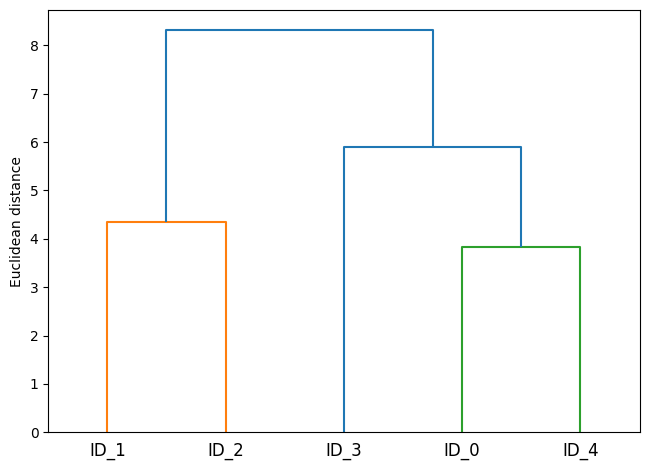

In [10]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

row_dendr=dendrogram(
    row_clusters,
    labels=labels
)

plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

#### Dendrogram to heatmap

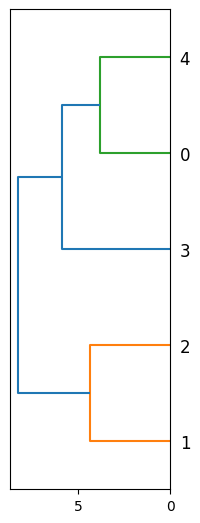

In [11]:
fig=plt.figure(figsize=(8,8), facecolor='white')
axd=fig.add_axes([0.09,0.1,0.2,0.6])
row_dendr=dendrogram(row_clusters,
                     orientation='left')

In [12]:
df_rowclust=df.iloc[row_dendr['leaves'][::-1]]

In [13]:
axm=fig.add_axes([0.23,0.1,0.6,0.6])
cax=axm.matshow(df_rowclust,
                interpolation='nearest',
                cmap='hot_r')

In [20]:
axd.set_xticks([])
axd.set_yticks([])
for i in axd.spines.values():
    i.set_visible(False)

fig.colorbar(cax)
axm.set_xticks(range(len(df_rowclust.columns) + 1))
axm.set_yticks(range(len(df_rowclust.index) + 1))
axm.set_xticklabels(['']+list(df_rowclust.columns))
axm.set_yticklabels(['']+list(df_rowclust.index))

# plt.tight_layout()
plt.show()

In [22]:
from sklearn.cluster import AgglomerativeClustering
ac=AgglomerativeClustering(n_clusters=3,
                           metric='euclidean',
                           linkage='complete')

labels=ac.fit_predict(X)
print(f'Cluster labels: {labels}')

Cluster labels: [1 0 0 2 1]


In [23]:
from sklearn.cluster import AgglomerativeClustering
ac=AgglomerativeClustering(n_clusters=2,
                           metric='euclidean',
                           linkage='complete')

labels=ac.fit_predict(X)
print(f'Cluster labels: {labels}')

Cluster labels: [0 1 1 0 0]
